<h1>Decision Tree und Random-Forest</h1>

Entscheidungsbäume sind Bäume, die das Dataset aufteilen können, um daraus eine Schlussfolgerung zu ziehen.

<i>Abb1</i>: Vergleich der Datasets. Links: eine einfache Boundary reicht. Rechts: mehrere Boundaries wären nötig.

<img src="./files_data/img/sklearn_dtrm_1.PNG" width=700 hight=400>

Bei einem Dataset das einfach zu überblicken ist, reicht es eine einfache Boundary zu ziehen, um diese Punkte zu klassifizieren. Dann könnte man zum Beispiel ein SVM Model nutzen, um das Problem zu lösen. 

Bei einem Dataset, das nicht so einfach durch eine Boundary separiert werden kann, muss es ggf. aufgeteilt werden, um mehrere Boundaries zu ziehen. Genau das machen auch die Bäume.

Visualisiert  lässt sich das einfach erklären. <br>

<i>Abb2</i>: Beispiel Dataset.

<img src="./files_data/img/sklearn_dtrm_3.PNG" width=300 hight=500>

Die Abbildung 2 zeigt ein einfaches Dataset, daraus soll jetzt ein Baum entstehen. 

Es kann so vorgegangen werden, dass als Erstes das Feature "Abteilung" aufgespalten wird. Bei dieser Aufspaltung entstehen 3 weitere Knoten.

<i>Abb3</i>: Split bei Abteilung.

<img src="./files_data/img/sklearn_dtrm_4.PNG" width=700 hight=400>

Nach der Aufteilung sehen wir die Verteilung der positiven und negativen Einträge. Die Information der Einträge können wir z. B. mit der Entropie beschreiben. 

Ziel ist es, die Features aufzuspalten, die nahezu eindeutige Informationen liefern. Wie bei dem Feature "Programmierung" nach der Aufspaltung des Features "Abteilung" müssen keine neuen Äste geformt werden, um eine Ja/Nein Antwort zu bekommen. 

Sind bei jeder Spaltung gemischte Informationen, müssen immer wieder Äste der einzelnen Features geformt werden, bis eine klare Antwort zusehen ist.  

Um diese Features mit nahezu eindeutigen Informationen zu finden, kann z. B. Entropie eingesetzt werden.

<i>Abb4</i>: Split beim Feature "Unternehmen".

<img src="./files_data/img/sklearn_dtrm_5.PNG" width=700 hight=400>

Die Reihenfolge wie der Baum aufgeteilt wird, spielt also eine wichtige Rolle.

Für das Training und das Beispiel nutzen wir ein Dataset, wo es um Kredite geht, ob diese gewährt werden oder nicht.

> https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset [Letzter Zugriff: 07.06.2024]


In [74]:
# Imports
import pandas as pd

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [42]:
# Erstelle Dataframe aus der CSV Datei. 
loan_df = pd.read_csv("./files_data/data/loanClass.zip", compression='zip')
loan_df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [43]:
# Zeige, welche Features dafür sorge, dass der Kredit genehmigt wird. 
loan_df[loan_df['loan_status'] == 'Approved' ].head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
6,42,Male,Lawyer,Doctoral,Married,120000,790,Approved


In [44]:
loan_df[loan_df['loan_status'] == 'Approved' ].count()

age                45
gender             45
occupation         45
education_level    45
marital_status     45
income             45
credit_score       45
loan_status        45
dtype: int64

In [45]:
loan_df[loan_df['loan_status'] == 'Denied' ].count()

age                16
gender             16
occupation         16
education_level    16
marital_status     16
income             16
credit_score       16
loan_status        16
dtype: int64

Ohne zu sehr ins Detail zu gehen, geht es weiter. Die Features, die Strings enthalten, müssen erst dekodiert werden.

In [46]:
loan_df['occupation'].unique

<bound method Series.unique of 0         Engineer
1          Teacher
2          Student
3          Manager
4       Accountant
          ...     
56       Architect
57    Receptionist
58          Banker
59          Writer
60            Chef
Name: occupation, Length: 61, dtype: object>

Für die Features occupation und education_level verwenden wir ein Label Encoding, für die anderen (marital_status, gender, loan_status) On Hot Encode.

In [47]:
# On Hot Encode für gender und marital_status.
gender_married_df = pd.get_dummies(\
    loan_df[ ['gender', 'marital_status', 'loan_status']], drop_first=True, dtype='int')
gender_married_df.head()

,gender_Male,marital_status_Single,loan_status_Denied
0,1,0,0
1,0,1,0
2,1,1,1
3,0,0,0
4,1,0,0


In [48]:
# Sklearn Label Encoder. 
le = LabelEncoder()
loan_df['occupation']       = le.fit_transform(loan_df['occupation'] )
loan_df['education_level']  = le.fit_transform(loan_df['education_level'] )

In [49]:
loan_df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,12,1,Married,85000,720,Approved
1,45,Female,35,4,Single,62000,680,Approved
2,28,Male,33,3,Single,25000,590,Denied
3,51,Female,16,1,Married,105000,780,Approved
4,36,Male,0,1,Married,75000,710,Approved


Jetzt müssen die nicht benötigten Features mit Strings entfernt und die Neuen eingefügt werden.

In [50]:
# Lösche die drei Spalten, wo wir On Hot Encode verwendet haben. 
loan_df.drop(['gender', 'marital_status', 'loan_status'], axis='columns', inplace=True)
# Füge die Neuen ein. 
loan_df = pd.concat([loan_df, gender_married_df], axis='columns')
loan_df.head()

,age,occupation,education_level,income,credit_score,gender_Male,marital_status_Single,loan_status_Denied
0,32,12,1,85000,720,1,0,0
1,45,35,4,62000,680,0,1,0
2,28,33,3,25000,590,1,1,1
3,51,16,1,105000,780,0,0,0
4,36,0,1,75000,710,1,0,0


Dann können wir ein Train- und Testset erstellen.

In [51]:
X_train, X_test, y_train, y_test = \
                     train_test_split(loan_df.drop(['loan_status_Denied'], axis="columns"), \
                                     loan_df['loan_status_Denied'], test_size=0.3)

In [52]:
X_train.shape

(42, 7)

Jetzt kann das Model erstellt und trainiert werden.

In [61]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.9473684210526315

Der Baum kann ebenfalls visualisiert werden. <br>
Je nach Dataset und Einstellung sieht es anders aus.

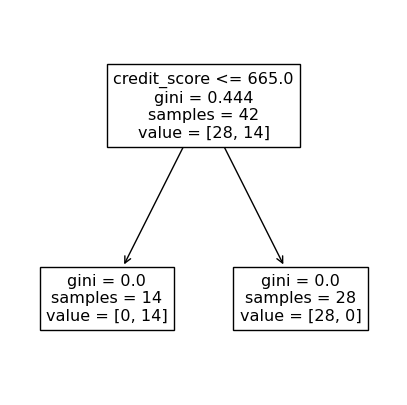

In [62]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(5, 5)) 
tree.plot_tree(tree_model,ax=ax,feature_names=list(loan_df.columns))
plt.show()

<h1>Random-Forest</h1>

<i>Abb5</i>: Funktionsweise von Random-Forest.
<center>
    <img src="./files_data/img/sklearn_dtrm_2.PNG" width=600 hight=600>
</center>

Das gegebene Dataset wird in n-Random Batches aufgeteilt. Jedes dieser Batches kann unterschiedlich viele positive oder negative Samples haben.

Aus diesen Batches werden wie beim normalen Decision Tree Bäume erstellt. Mit vielen Bäumen hat man ein Forest => Random-Forest

Bei einer Prediction kann jeder Baum seine Entscheidung machen. Am Ende wird durch ein Vote entschieden, welche Entscheidung genommen wird (Mehrheitsentscheidung). 

Bei Random-Forest werden auch die Features aufgeteilt. 

Jetzt nutzen wir Random-Forest, um herauszufinden, ob eine Person auf der Titanic überlebt hat oder nicht.

> https://www.kaggle.com/datasets/yasserh/titanic-dataset [Letzter Zugriff: 09.06.2024]

In [103]:
# Lade Titanic Dataset.
df_tit = pd.read_csv("./files_data/data/titanic.zip", compression='zip')
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
# Lösche einige Features, die weniger relevant sind.
df_tit = df_tit.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis="columns")
df_tit.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [105]:
# Wende On Hot Enode auf das Feature "Sex" an.
df_tit['Sex'] = pd.get_dummies(df_tit['Sex'], drop_first=True, dtype='int')
df_tit.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [106]:
# Schaue on es NaN Values gibt.
df_tit.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [107]:
# Fülle Alter auf mit Durchschnitt.
df_tit['Age'] = df_tit.Age.fillna(df_tit.Age.mean()) 
df_tit.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [108]:
# Teile Daten auf in Train- und Testset
X_train, X_test, y_train, y_test = train_test_split(df_tit.drop(['Survived'], axis='columns'), \
                                                    df_tit['Survived'] ,test_size=0.2)

In [109]:
# Erstelle Model und trainiere.
rm_model = RandomForestClassifier(n_estimators=3)  # n_estimators: 3 Batches => 3 Modelle 
rm_model.fit(X_train, y_train) 
rm_model.score(X_test, y_test)

0.7988826815642458

Die einzelnen Bäume von Random-Forest können ausgegeben werden. <br>
Für eine bessere Übersicht werden nur einige Abzweigungen gezeigt. 

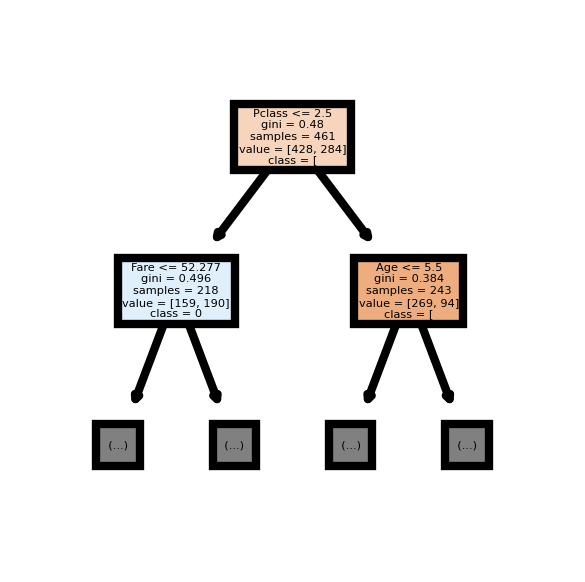

In [129]:
# Plot eines einzelnen Baumes. 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1,1), dpi=600)

tree.plot_tree(rm_model.estimators_[0],    # Baum-Index 
               feature_names = list(X_train.columns) ,  
               class_names   = list(str(list(y_train))),
               max_depth=1,  # Tiefe des Plots
               filled = True);
fig.savefig('random-forest_tree.png')

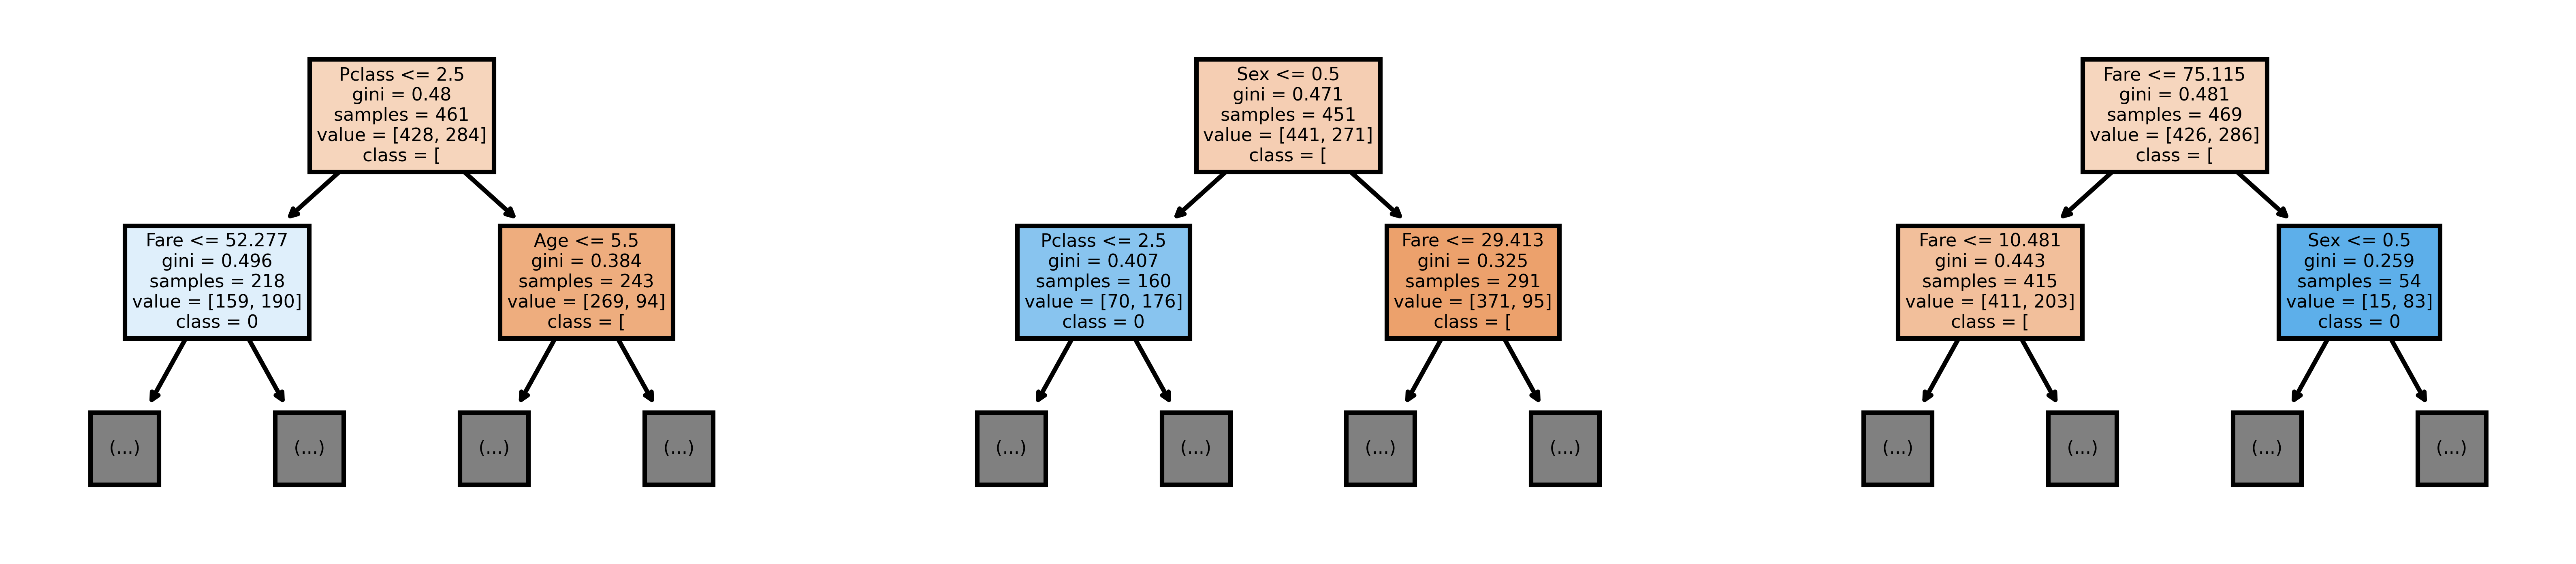

In [140]:
# Plot mehrerer Bäume.
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=800)

for i in range(0, 3): 
    tree.plot_tree(rm_model.estimators_[i],    # Baum-Index 
                   feature_names = list(X_train.columns) ,  
                   class_names   = list(str(list(y_train))),
                   max_depth=1,  # Tiefe des Plots
                   ax = axes[i],
                   filled = True);

Bei diesem Plot sieht man deutlich, dass jeder Baum ein anderes Feature als Wurzel nimmt, basierend auf dem Batch des Datasets.

Die untere Zelle plottet alle Bäume ohne Tiefenfeschränkung. <br>
So ist die Struktur der Bäume deutlich sichtbarer. 

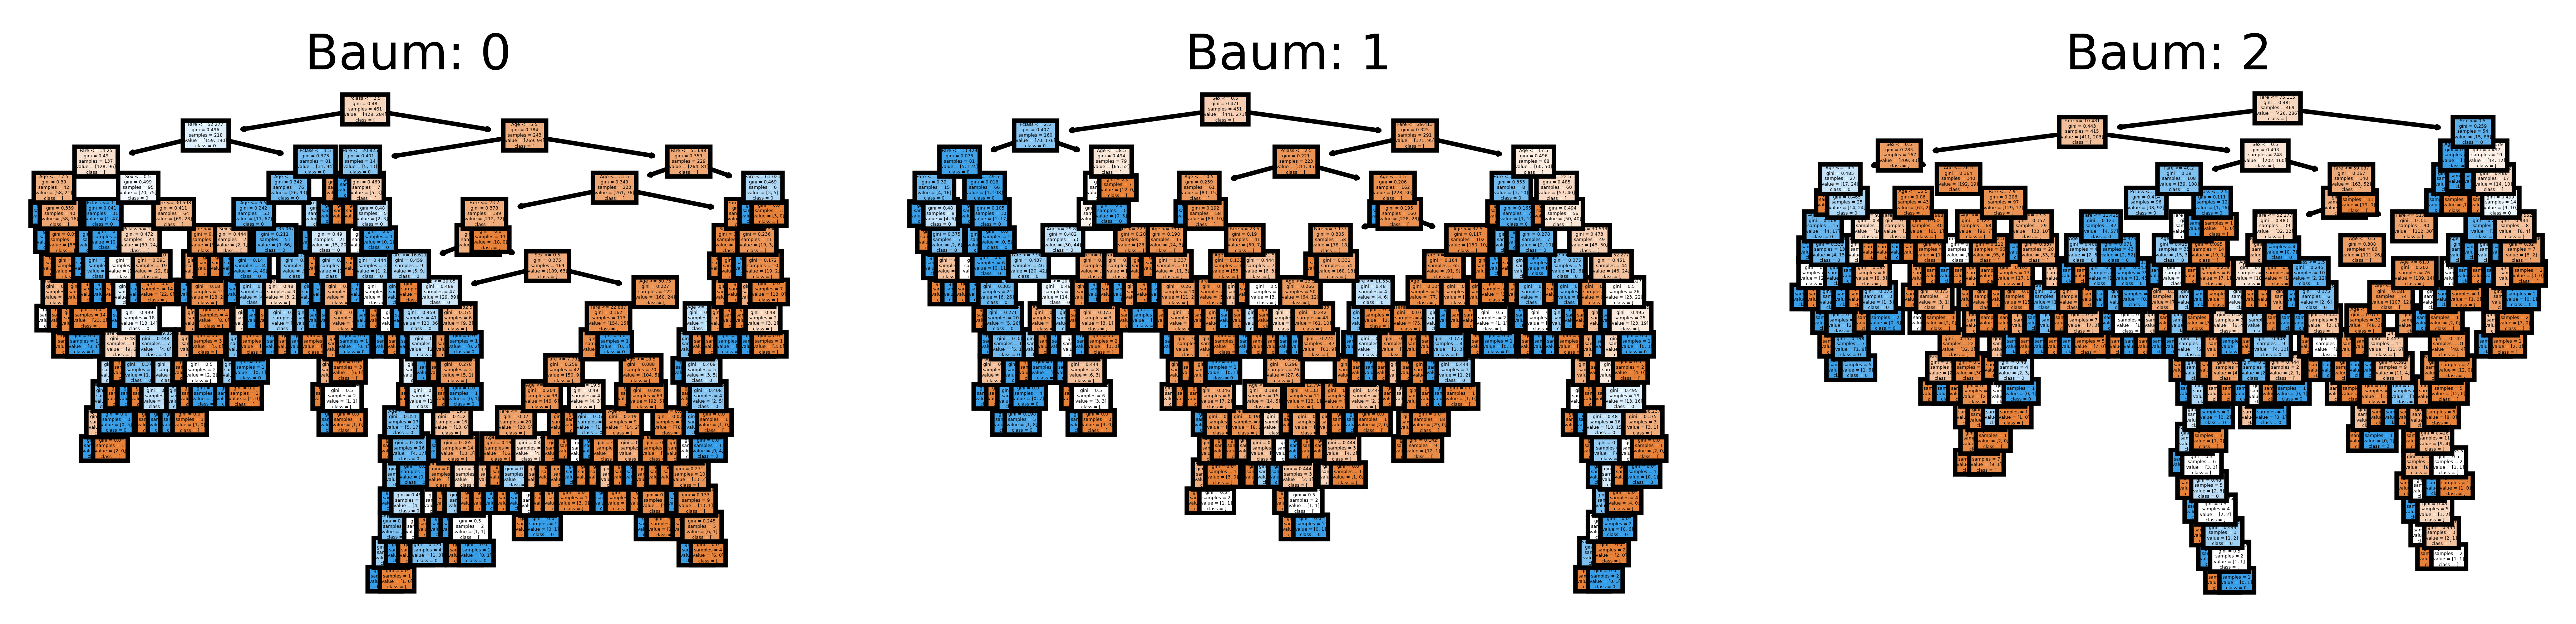

In [141]:
# Das Plotten kann Zeit in Anspruch nehmen. # 
# - Als Bild kann der Inhalt analysiert werden. 
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(rm_model.estimators_[index],
                   feature_names = list(X_train.columns), 
                   class_names=list(str(list(y_train))),
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title(f'Baum: {index}', fontsize = 11)